# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import plot_importance
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from keras.utils import np_utils
from keras.models import model_from_json
from tensorflow import keras 

import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import  Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 


from tkinter import *

#Bibliotecas para tratar a imagem
from pil import Image, ImageOps, ImageEnhance
from pil import Image, ImageTk, ImageDraw
import pil

# Save and Load Models
import joblib

# LOADING THE DATASET

In [2]:
listapixel=[f'pixel_{x}'for x in range(784)]
listapixel= ['target']+listapixel

In [3]:
data= pd.read_csv('A_Z Handwritten Data.csv', names= listapixel)

# EXPLORATORY DATA ANALYSIS

In [5]:
data.head()

,target,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


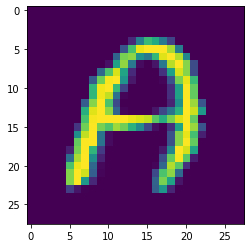

In [6]:
plt.imshow(data.iloc[2,1:].to_numpy().reshape(28,28))

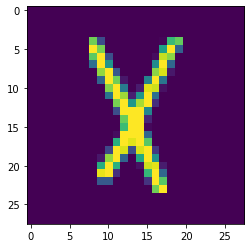

In [7]:
plt.imshow(data.iloc[352340,1:].to_numpy().reshape(28,28))

## GRAPH VISUALIZATION

In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [10]:
count=pd.DataFrame(data['target'].value_counts())
count=count.sort_index(ascending=True)

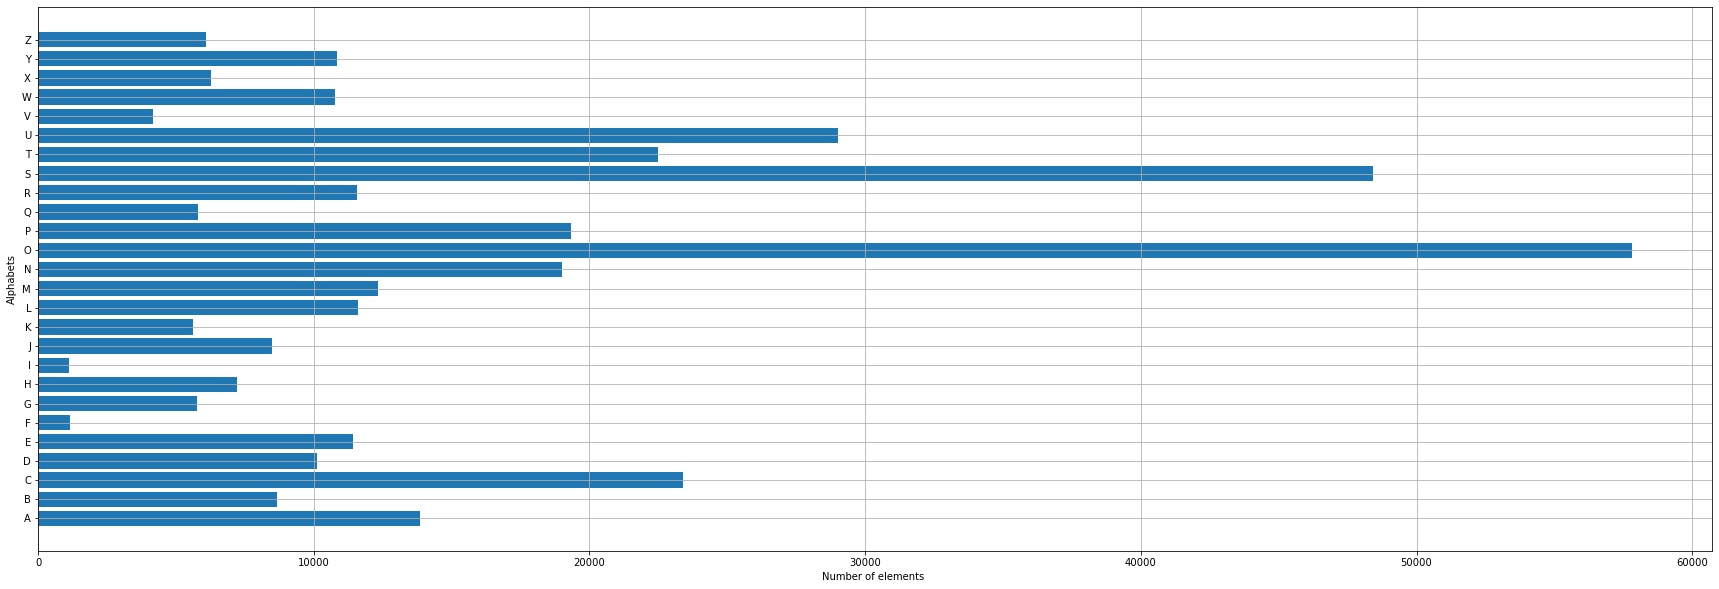

In [15]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i) #all alphabets

fig, ax = plt.subplots(1,1, figsize=(30,10))
ax.barh(alphabets, count['target'])

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

# DATA PREPARATION TO MODEL


In [16]:
X=data.drop('target', axis=1)
y=data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# PREVISION AND TRAIN - MODEL LBGM

In [17]:
lgb = LGBMClassifier(max_depth=3, n_estimators=50, colsample_bytree=.33, n_jobs=-1)
lgb.fit(X_train,Y_train)

LGBMClassifier(colsample_bytree=0.33, max_depth=3, n_estimators=50)

## CONFUSION MATRIX - MODEL LGBM

<AxesSubplot:>

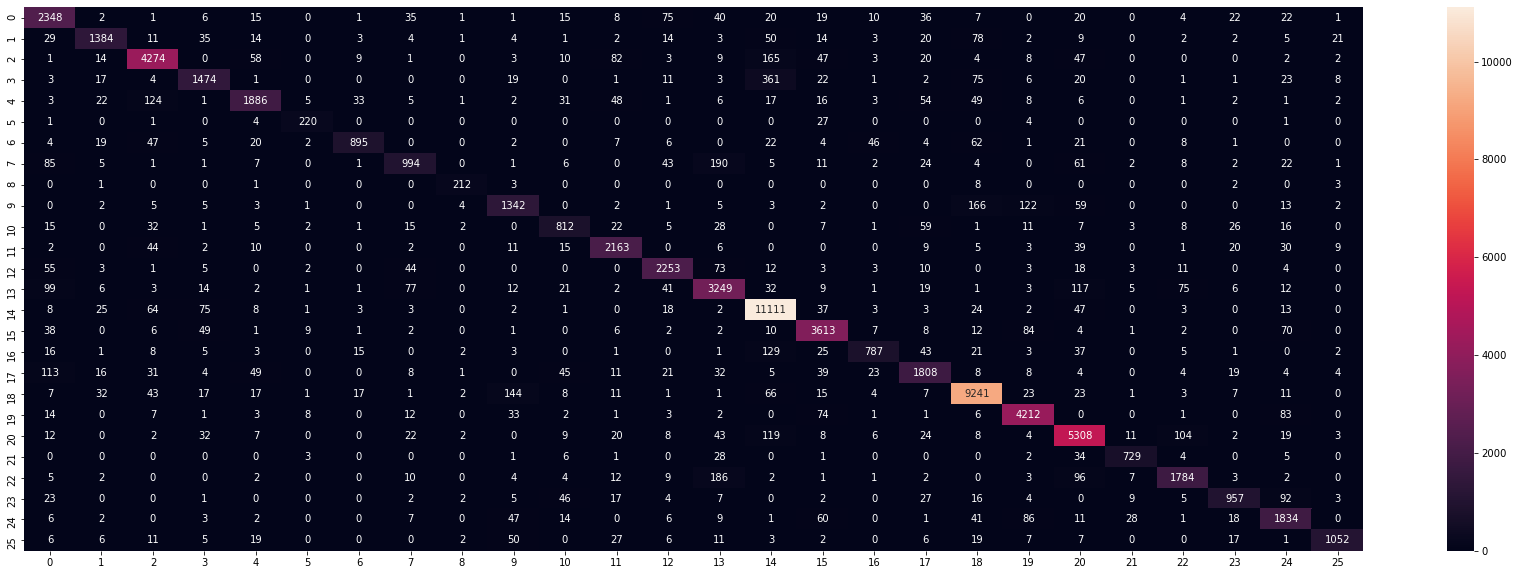

In [18]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(confusion_matrix(Y_test,lgb.predict(X_test)), annot= True, fmt='g')

## ROC_AUC_SCORE - LGBM

In [20]:
print("LGBM_Roc_Train",roc_auc_score(Y_train, lgb.predict_proba(X_train), multi_class='ovo'))
print("LGBM_Roc_Test",roc_auc_score(Y_test, lgb.predict_proba(X_test), multi_class='ovo'))

LGBM_Roc_Train 0.9940213166055579
LGBM_Roc_Test 0.9930802948233467


## SAVE MODEL - LGBM

In [64]:
joblib.dump(lgb, 'lgbm.pkl')

['lgbm.pkl']

## LOAD MODEL - LGBM

In [65]:
lgb=joblib.load('lgbm.pkl')

# PREDICT - CLASSIFICATION USING CNN
## DATA PREPARATION

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28,1)) # faz o Reshape da variável para um formato, 28 X 28 x 1
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28,1)) # faz o Reshape da variável para um formato, 28 X 28 x 1


X_train=X_train/255 #transforma os dados entre valores 0 e 1
X_test=X_test/255 #transforma os dados entre valores 0 e 1

num_classes = len(y.unique()) #número de classes que tem os meus dados

y_train=np_utils.to_categorical(y_train, num_classes=num_classes, dtype='int') # passar a variável y para categorica, uma vez que é um número atualmente
y_test=np_utils.to_categorical(y_test, num_classes=num_classes, dtype='int') # passar a variável y para categorica, uma vez que é um número atualmente


## MODEL PREPARATION - CNN PARAMETERS

In [15]:
model = Sequential()

model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))) # 1ªcamada convulocional 
model.add(MaxPool2D(pool_size=(2, 2), strides=1))
model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))) # 2ªcamada convulocional 
model.add(MaxPool2D(pool_size=(2, 2), strides=1))
model.add(Dropout(0.2)) # Drpa 20% dos dados

model.add(Flatten()) # transforma a imagem 28 x 28 em 1D para entrada

model.add(Dense(128,activation ="relu")) #camda ocultacom 128 neuronios
model.add(Dense(64,activation ="relu")) # camada oculta com 64 neuronios
model.add(Dense(32,activation ="relu")) # camada oculta com 32 neuronios

model.add(Dense(num_classes,activation ="softmax", name='predict')) #camada de saída

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy']) # loss é a função de perda devemos diminuir este valor
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14520)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

## TRAIN MODEL - CNN

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size =200 )

Epoch 1/10
1490/1490 [==============================] - 313s 210ms/step - loss: 0.0464 - accuracy: 0.9866 - val_loss: 0.0535 - val_accuracy: 0.9841
Epoch 2/10
1490/1490 [==============================] - 316s 212ms/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 0.0373 - val_accuracy: 0.9897
Epoch 3/10
1490/1490 [==============================] - 329s 221ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 4/10
1490/1490 [==============================] - 313s 210ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0348 - val_accuracy: 0.9902
Epoch 5/10
1490/1490 [==============================] - 343s 230ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0380 - val_accuracy: 0.9902
Epoch 6/10
1490/1490 [==============================] - 309s 207ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0311 - val_accuracy: 0.9919
Epoch 7/10
1490/1490 [==============================] - 316s 212ms/step - loss: 0.0126 - accuracy: 0.9959 - val_

## CONFUSION MATRIX - CNN

<AxesSubplot:>

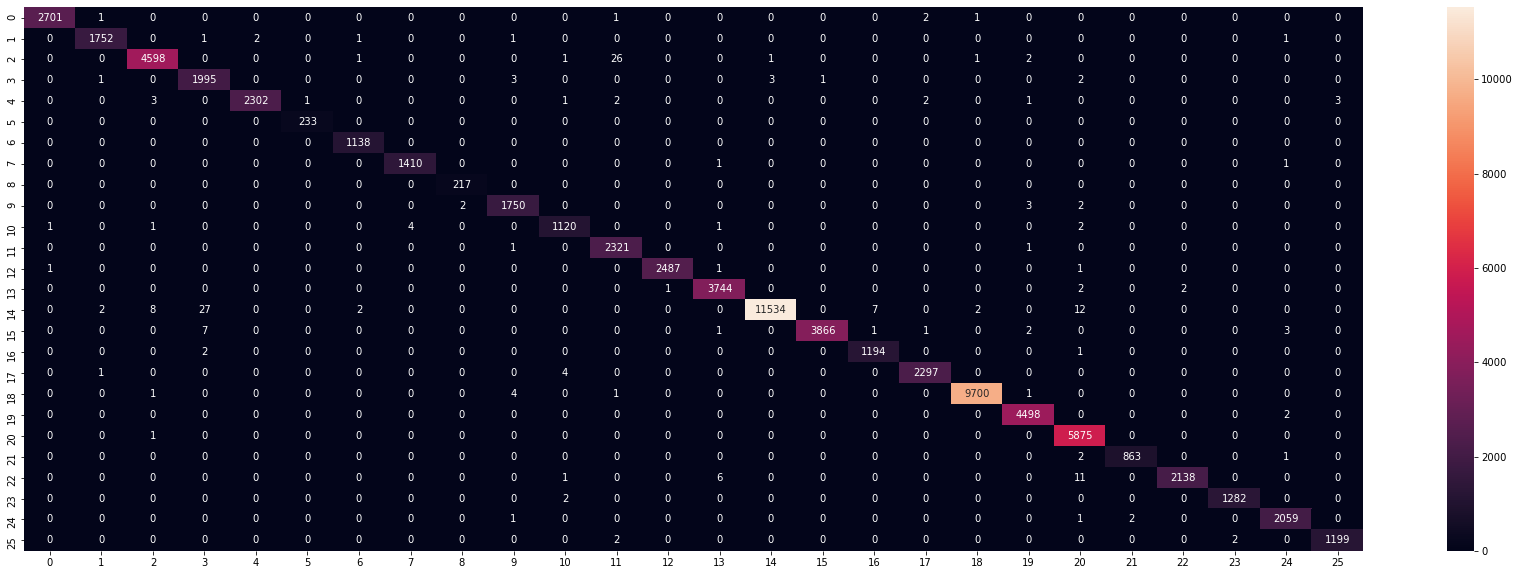

In [26]:
fig, ax = plt.subplots(figsize=(30,10) )
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),loaded_model.predict(X_test).argmax(axis=1)), annot= True, fmt='g')

## ROC_AUC_SCORE - CNN

In [25]:
print("CNN_Roc_Train",roc_auc_score(y_train.argmax(axis=1), loaded_model.predict(X_train), multi_class='ovo'))
print("CNN_Roc_Test",roc_auc_score(y_test.argmax(axis=1), loaded_model.predict(X_test), multi_class='ovo'))


CNN_Roc_Train 0.999983805523588
CNN_Roc_Test 0.9999947761837442


## Save Model - CNN

In [22]:
model_json=model.to_json()
with open ('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('letter.h5')

# Load Model -CNN

In [21]:
json_file = open ('model.json', 'r')
loaded_model_json= json_file.read()
json_file.close()

loaded_model= model_from_json(loaded_model_json)
loaded_model.load_weights('letter.h5')

In [12]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

## LOSS, ACURACY - MODEL LOADED-CNN

In [19]:
Loss_teste, Acuracia_teste = loaded_model.evaluate(X_test,y_test)

2328/2328 [==============================] - 22s 10ms/step - loss: 0.0106 - accuracy: 0.9972


# Image Enhance

In [30]:
img = Image.open('imagens teste/N.png').convert('L')  # convert image to 8-bit grayscale
img=ImageEnhance.Brightness(img).enhance(2)
#img=ImageEnhance.Sharpness(img).enhance(0)
img=ImageEnhance.Contrast(img).enhance(10)
img=ImageEnhance.Sharpness(img).enhance(10)
img=ImageOps.invert(img)

img=img.resize((28,28))

WIDTH, HEIGHT = img.size

newdata = list(img.getdata()) # convert image data to a list of integers
# convert that to 2D list (list of lists of integers)
newdata = [newdata[offset:offset+WIDTH]for offset in range(0, WIDTH*HEIGHT, WIDTH)]
newdata=np.array(newdata)

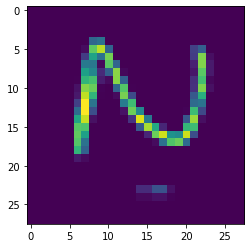

In [31]:
plt.imshow(newdata.reshape(28,28))

# Model CNN - Predict

In [32]:
newdata=newdata/255
newdata=newdata.reshape(1,28,28,1)
predict=loaded_model.predict(newdata)
letter=predict.argmax()
print('Letra que foi escrita é: ',word_dict[letter], 'com probabilidade de acertar de: ',"%.2f" % (predict[0][letter]*100),"%")

Letra que foi escrita é:  N com probabilidade de acertar de:  99.96 %


# Model LGBM  - Predict

In [33]:
newdata=newdata.reshape(1,784)
predict=lgb.predict_proba(newdata)
letter=predict.argmax()
print('Letra que foi escrita é: ',word_dict[letter], 'com probabilidade de acertar de: ',"%.2f" % (predict[0][letter]*100),"%")

Letra que foi escrita é:  J com probabilidade de acertar de:  16.85 %


In [609]:
from tkinter import *
from PIL import Image, ImageTk, ImageDraw
import PIL

width=500
height=500
white = (255, 255, 255)

def save_picture():
    filename ="image.png"
    image1.save(filename)
    
def paint(event):
    x1,y1=(event.x-6),(event.y-6)
    x2,y2 = (event.x+6), (event.y+6)
    canvas.create_oval(x1,y1,x2,y2, fill='red', width=25)
    draw.line([x1,y1,x2,y2], fill='black',width=25)

    
app = Tk()
canvas = Canvas(app, width=width, height=height, bg='white')
canvas.pack()



image1=PIL.Image.new('RGB', (width, height), white)
draw=ImageDraw.Draw(image1)

canvas.pack(expand=YES, fill=BOTH)

canvas.bind("<B1-Motion>", paint)


button = Button(
    text="Save Picture!",
    width=25,
    height=5,
    bg="blue",
    fg="yellow",
    command=save_picture
)


button.pack()

app.mainloop()



In [610]:
img = Image.open('image.png').convert('L')  # convert image to 8-bit grayscale
img=ImageEnhance.Sharpness(img).enhance(30)
img=ImageEnhance.Brightness(img).enhance(0.9)
img=ImageEnhance.Contrast(img).enhance(20)
#img=ImageEnhance.Sharpness(img).enhance(0)
img=ImageOps.invert(img)

img=img.resize((28,28))

WIDTH, HEIGHT = img.size

newdata = list(img.getdata()) # convert image data to a list of integers
# convert that to 2D list (list of lists of integers)
newdata = [newdata[offset:offset+WIDTH]for offset in range(0, WIDTH*HEIGHT, WIDTH)]
newdata=np.array(newdata)

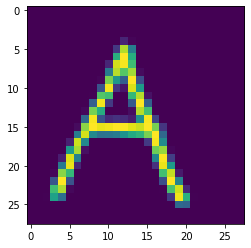

In [611]:
plt.imshow(newdata.reshape(28,28))

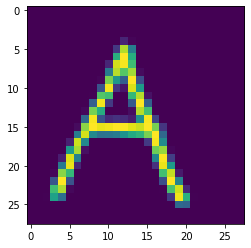

In [612]:
plt.imshow(newdata.reshape(28,28))

In [613]:
newdata=newdata/255
newdata=newdata.reshape(1,28,28,1)
predict=loaded_model.predict(newdata)
letter=predict.argmax()
print('Letra que foi escrita é: ',word_dict[letter], 'com probabilidade de acertar de: ',"%.2f" % (predict[0][letter]*100),"%")

Letra que foi escrita é:  A com probabilidade de acertar de:  100.00 %


In [73]:
 pip install Pillow==2.2.1

  Using cached Pillow-2.2.1.zip (2.2 MB)
  Running setup.py clean for Pillow
Failed to build Pillow
  Attempting uninstall: Pillow
    Found existing installation: pillow 8.2.0Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-yyp4wnpu\\pillow_4c6ee6b3e83640888b6b8af916e3c8ab\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-yyp4wnpu\\pillow_4c6ee6b3e83640888b6b8af916e3c8ab\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\User\AppData\Local\Temp\pip-wheel-lbry47t5'
       cwd: C:\Users\User\AppData\Local\Temp\pip-install-yyp4wnpu\pillow_4c6ee6b3e83640888b6b8af916e3c8ab\
  Complete output (100 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\PIL
  copying PIL\ArgImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\Bd


    Uninstalling pillow-8.2.0:
      Successfully uninstalled pillow-8.2.0
    Running setup.py install for Pillow: started
    Running setup.py install for Pillow: finished with status 'error'
  Rolling back uninstall of pillow
  Moving to c:\users\user\anaconda3\lib\site-packages\pil\
   from C:\Users\User\anaconda3\Lib\site-packages\~il
  Moving to c:\users\user\anaconda3\lib\site-packages\pillow-8.2.0.dist-info\
   from C:\Users\User\anaconda3\Lib\site-packages\~illow-8.2.0.dist-info


  copying PIL\GimpGradientFile.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\GimpPaletteFile.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\GribStubImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\Hdf5StubImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\IcnsImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\IcoImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\Image.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageChops.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageCms.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageColor.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageDraw.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageDraw2.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageEnhance.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageFile.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageFileIO.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageFilter.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\ImageFont

In [82]:
from platform import python_version

print(python_version())


3.8.8


In [80]:
import PIL

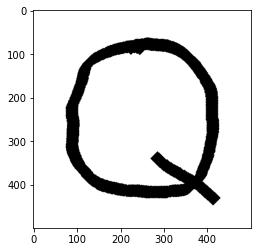

In [81]:
import PIL
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image, ImageTk, ImageDraw

img = mpimg.imread('image.png')
plt.imshow(img)

In [1]:
import PIL

ModuleNotFoundError: No module named 'PIL'

In [76]:
import PIL
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

img = load_sample_image('image.png')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

AttributeError: Cannot find sample image: image.png